# Data Analysis: Danish Drug Price analysis on Abilify 

This Project focuses on analyzing the price per dosage of the Drug Abilify between firms in the Danish Drug price dataset in lmpriser_eSundhed_200323.xlsx. Abilify was chosen because there are many firms throughout 2015 to 2020 that sold the drug. The dataset contains descriptive variables of each drug from the unique product number and form to quantitative variables on producer selling and consumer purchasing price.

Import all Essential Packages

In [4]:
# Loading essential packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import os 

# Set file and directory path
assert os.path.isdir('Data/') 
assert os.path.isfile('Data/lmpriser_eSundhed_200323.xlsx')
os.listdir('Data/')

['lmpriser_eSundhed_200323.xlsx']

# Read and clean data

## Danish Drug price Data

We first loaded the whole drug dataset from lmpriser_eSundhed_200323.xlsx and coverted it to a pandas dataframe. We then cleaned the data to focus on the necessary variables of our analysis. 

In [5]:
# a. Load Medicine data into a pandas dataframe 
file = 'Data/lmpriser_eSundhed_200323.xlsx' # Set Danish Pharma data to variable file 
medicine_primary = pd.read_excel(file) # Import excel sheet for analysis 

# b. Structure Primary Dataframe
column_english = {'Lægemiddel':'Medicine', 
                  'Varenummer':'Product_number', 
                  'Pakning':'Packing', 
                  'Styrke':'Strength', 
                  'Firma':'Company', 
                  'Indikator':'Indicator'}
medicine_primary.rename(columns = column_english, inplace=True) # Convert columns from Danish to English

column_values = list(medicine_primary.columns.values) # Create list of dataframes column names
column_values = column_values[8:]# narrow list to only focus on date variables

date_to_string = {} # Create dictionary for renaming date variables

# Loop throught all possible date variables and add an e in front in order to make it easier to manipulate 
for i in column_values:
    date_to_string[i] = f'e{i}'

medicine_primary.rename(columns = date_to_string, inplace=True) # Rename date variables in primary dataframe

# c. Create sub-dataframe from the Primary dataframe focusing on the medicine Abilify 

medicine_dcopy = medicine_primary.copy() # Copying main dataframe prior to narrowing focus
abilify = medicine_dcopy.loc[medicine_dcopy['Medicine']=='Abilify'] # Focus on Abilify Medicine
I = abilify.Indicator.str.contains('AUP_pr_DDD') # filter to focus on price per daily dose
abilify = abilify.loc[I, :] # Generate new dataframe with price per daily dose 
drop_list = ['ATC', 'Form', 'Medicine'] # Filter out columns not to focus on
abilify.drop(drop_list, axis=1, inplace=True)
abilify.reset_index() # Reset index after filtering

# d. Create long format of dataframe 

abilify_long = pd.wide_to_long(abilify, stubnames='e', i="Product_number", j='Date') # Created long format of Abilify Dataframe
e_grouped = abilify_long.groupby('Product_number')['e'] # Grouped by product number
abilify_long = abilify_long.sort_values(['Product_number','Date']) # Organized product number by date

## Explore data set

Explore the price per dosage within and across producers


The **static plot** is:

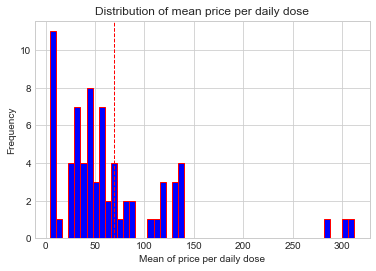

In [9]:
# Calculated mean value of each product number 
e_mean = abilify_long.groupby('Product_number')['e'].mean() 
e_mean.name ='e_mean'
abilify_new = abilify.set_index('Product_number').join(e_mean, how='left') #merged mean values into original wide dataframe

# Plot the distribution of price per daily dose in abilify_new
plt.hist(abilify_new['e_mean'], bins=50, align='left', color='b', edgecolor='red',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Mean of price per daily dose")
plt.ylabel("Frequency")
plt.title("Distribution of mean price per daily dose")

# Add draw a vertical line for avarage 
plt.axvline(abilify_new['e_mean'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

This non-symmetric histogram illustrates the distribution of the mean price per daily dose of the drug Abilify. The distribution has a higher frequency of observations to the left of the plot. The dotted red line represents the average mean price, being around 70 DKK. The highest peaks are between 0 and 50 DKK and the frequency is higher for the prices below the average mean price where most observations can be found. The isolated bars at to the right of the distribution are identified as outliers.

The **interactive plot** is:

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Analysis

Quick analysis on Mean, Median and Deviation of the Abilify drug across firms 

In [ ]:
e_mean = abilify_long.groupby('Product_number')['e'].mean() # Calculated mean value of each product number 
e_mean.name ='e_mean'

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.